# EDA

In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

params

In [2]:
DATA_DIR = '../../../datasets/kaggle/house_prices/'

## import data

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


data_descr

In [4]:
num_cols = []
cat_cols = []

for colname in df.columns:
    if df[colname].dtype in ['int64', 'float64']:
        num_cols.append(colname)
    else:
        cat_cols.append(colname)

len(num_cols), len(cat_cols)

(38, 43)

수치형 데이터의 분포

In [5]:
df[num_cols].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
biased_cols = []

for col in num_cols:
    # stddev = df[col].std()
    data_range = df[col].max() - df[col].min()
    mdiff = np.abs(df[col].median() - df[col].mean())
    print(mdiff, data_range*.05)
    
    if mdiff >= data_range * .1:
        biased_cols.append(col)
    

0.0 72.95
6.897260273972606 8.5
1.049958368026651 14.600000000000001
1038.3280821917815 10697.25
0.09931506849315053 0.45
0.5753424657534243 0.4
1.7321917808219496 6.9
9.134246575342559 3.0
103.68526170798899 80.0
60.13972602739727 282.2
46.54931506849315 73.7
89.74041095890414 116.80000000000001
65.92945205479441 305.5
75.6267123287671 217.9
346.99246575342465 103.25
5.844520547945206 28.6
51.46369863013706 265.40000000000003
0.42534246575342466 0.15000000000000002
0.057534246575342465 0.1
0.43493150684931514 0.15000000000000002
0.38287671232876713 0.1
0.13356164383561664 0.4
0.046575342465753344 0.15000000000000002
0.5178082191780824 0.6000000000000001
0.386986301369863 0.15000000000000002
1.4938361131255533 5.5
0.23287671232876717 0.2
7.019863013698625 70.9
94.2445205479452 42.85
21.660273972602738 27.35
21.954109589041096 27.6
3.4095890410958902 25.400000000000002
15.060958904109588 24.0
2.758904109589041 36.9
43.489041095890414 775.0
0.3219178082191778 0.55
0.1842465753425131 0.2


In [7]:
# log transform
df['WoodDeckSF'] = np.log1p(df['WoodDeckSF'])

In [8]:
for col in num_cols:
    iqr = df[col].quantile(q=.75) - df[col].quantile(q=.25)
    lower_bound = df[col].quantile(q=.25) - iqr * 1.5
    upper_bound = df[col].quantile(q=.75) + iqr * 1.5
    # print(lower_bound, upper_bound)

    number_of_outliers = df[
        (df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(number_of_outliers)
    
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

0
103
88
69
2
125
7
0
96
7
167
29
61
20
2
26
31
1
82
0
0
35
68
30
5
0
5
21
0
77
208
24
116
7
52
0
0
61


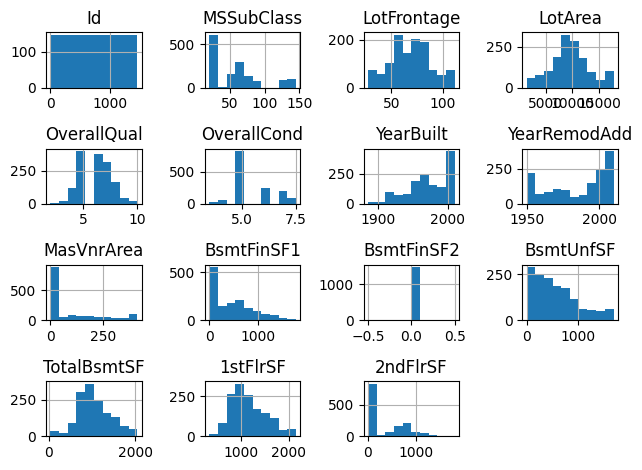

In [9]:
df.hist(column=num_cols[:15])
plt.tight_layout()
plt.show()

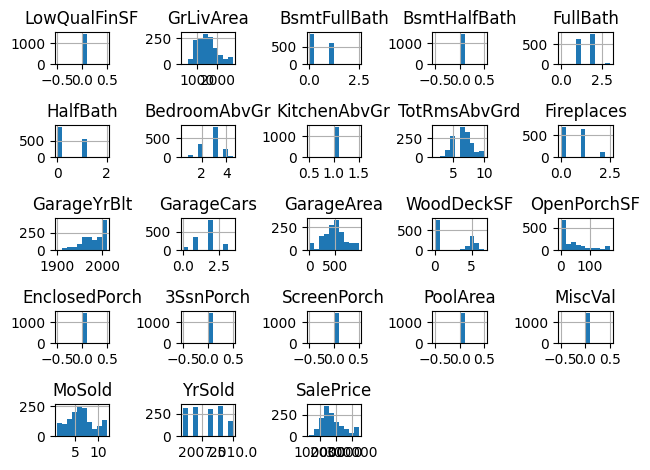

In [10]:
df.hist(column=num_cols[15:])
plt.tight_layout()
plt.show()

범주형 데이터의 분포

In [11]:
df[cat_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# preprocessing

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder()
ohe = ohe.fit(df[cat_cols])
ohe.get_feature_names_out()

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_Pave', 'Alley_nan', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', '

In [14]:
df_cat_array = ohe.transform(df[cat_cols]).toarray()
df_cat_array.shape

(1460, 267)

In [15]:
df[ohe.get_feature_names_out()] = df_cat_array
df = df.drop(columns=cat_cols)

/tmp/ipykernel_4064687/355322539.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = df_cat_array
/tmp/ipykernel_4064687/355322539.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = df_cat_array
/tmp/ipykernel_4064687/355322539.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

In [16]:
# df = pd.concat([df, pd.get_dummies(df[['Sex', 'Embarked']])], axis=1)
# df = df.drop(columns=['Sex', 'Embarked'])
# df.columns

In [17]:
# df = df.drop(columns=['Name', 'Ticket'])
# df.columns

In [18]:
# ## !! cabin 전처리도 은근 빡쎔 걍 패스하자
# # df['Cabin_area'] = df['Cabin'].apply(lambda x: x[0] if type(x) != float else np.nan)
# # df['Cabin_number'] = df['Cabin'].apply(lambda x: int(x[1:]) if type(x) != float else np.nan)
# df = df.drop(columns='Cabin')
# df.columns

# Correlation analysis with Pearson

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtFinSF2, Length: 1460, dtype: int64

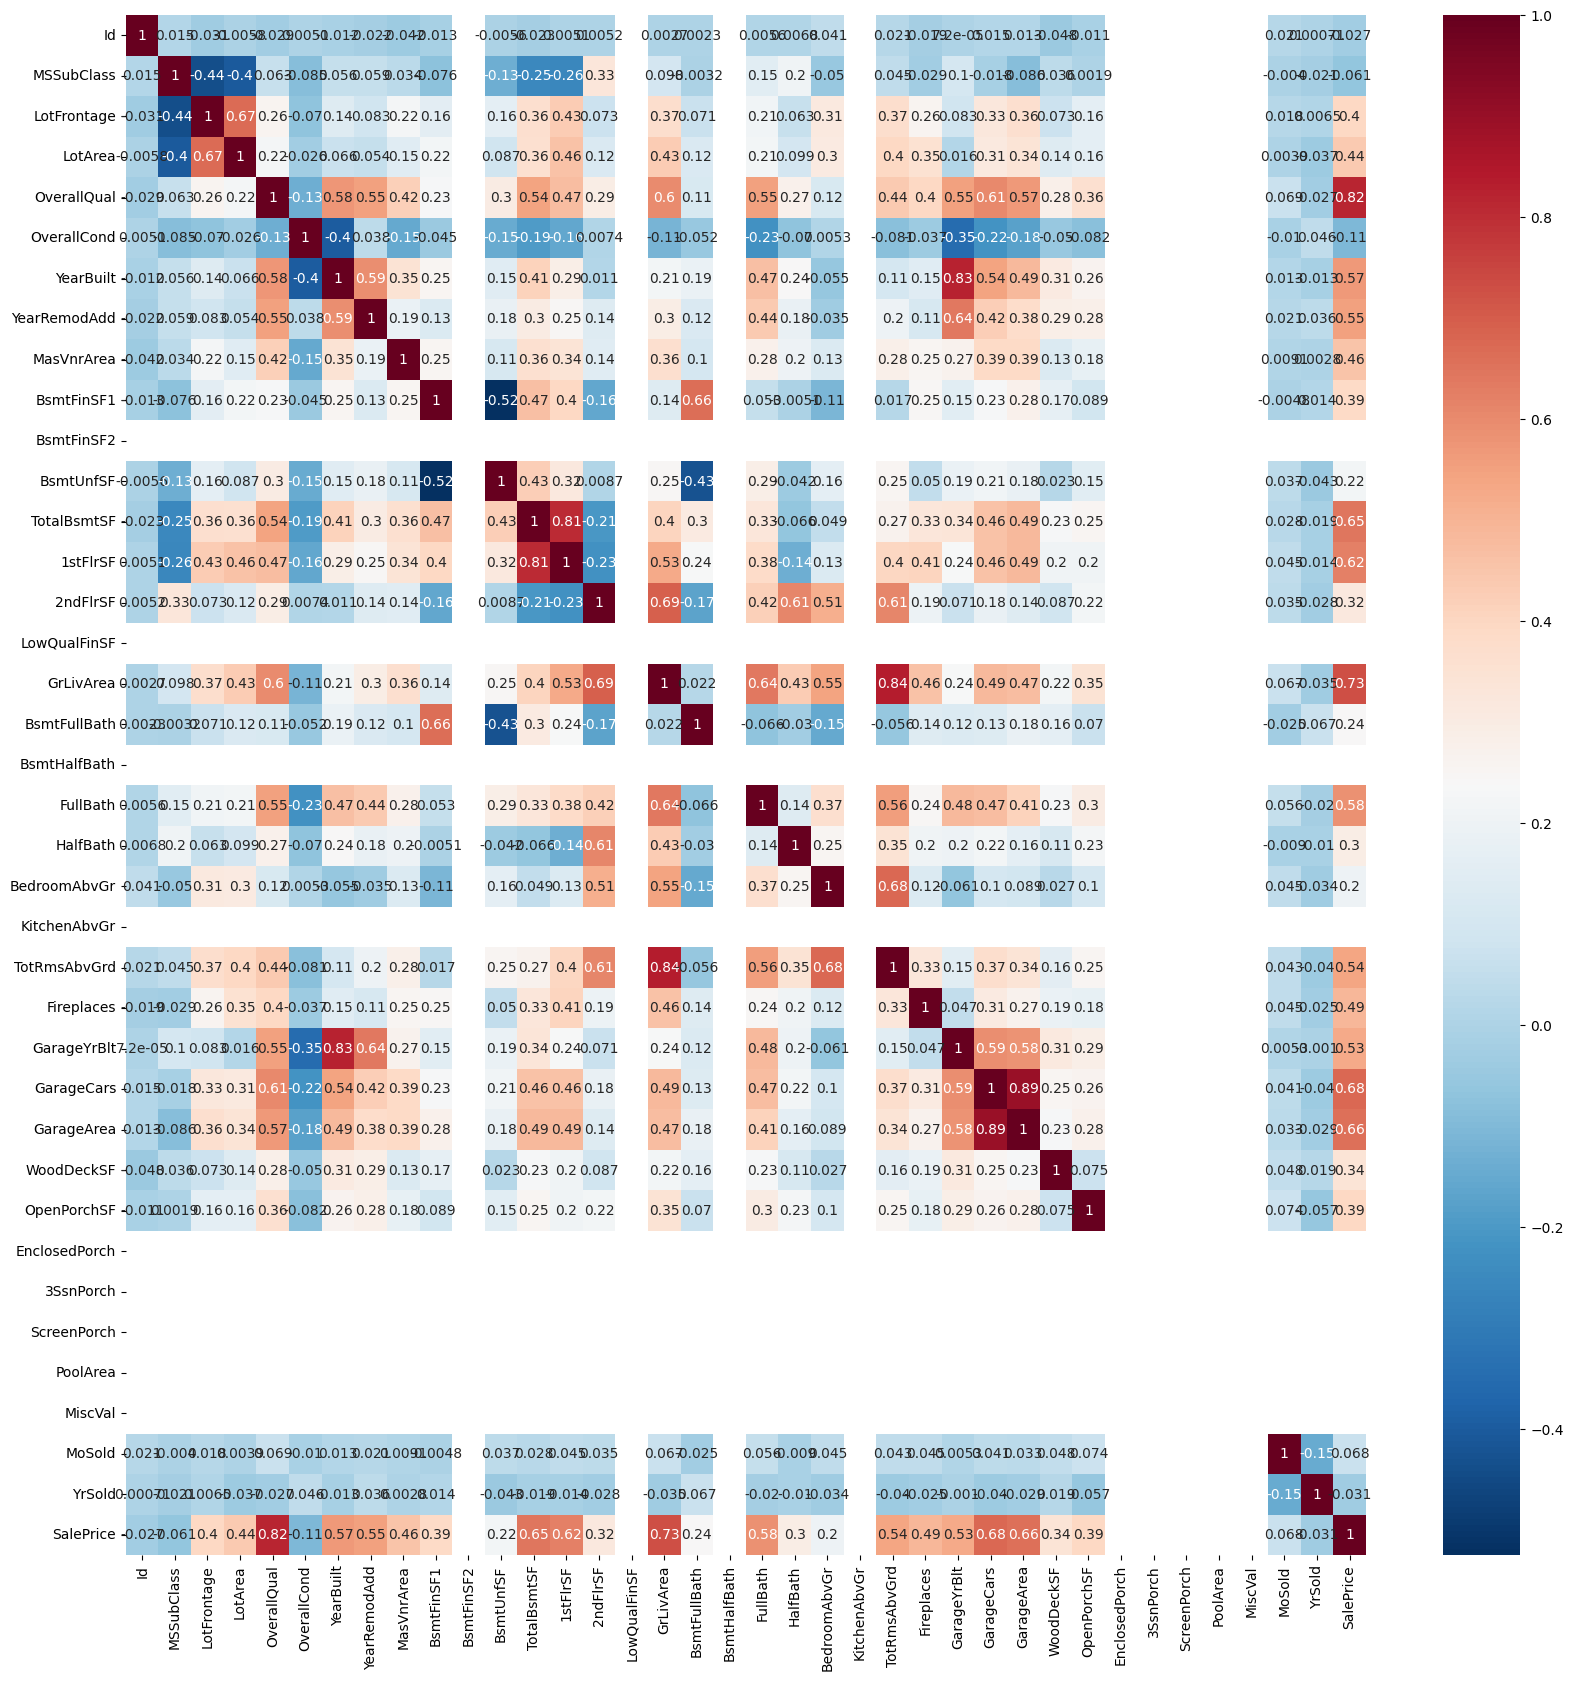

In [21]:
df_corr = df[num_cols].corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

여성이 많이 살고, 남성이 많이 죽음, S 에서 탄 사람이 많이 죽음, pclass와도 음의 관계. fare가 높을수록 많이 살음.

In [ ]:
np.random.normal(0, 1, 418)

array([-1.45088853,  0.07734981, -0.94282102, -0.71789951,  2.48853224,
       -0.41992764,  1.01355334,  0.28148611,  0.39628051,  1.83536954,
        0.65494049, -0.74227191, -1.13037109, -0.91104645, -0.80181527,
        0.04640155,  0.48653979,  0.75433099,  0.76850822, -0.93178533,
       -1.37047797,  0.11212717, -0.09193659, -0.32353094,  0.76606905,
        0.28713593, -0.15098907,  0.49268183, -1.79597359,  0.11576228,
       -1.12562518, -0.25268358, -0.29793881, -1.53232877, -0.07762528,
        0.89554093,  0.00819938,  0.26190059,  1.82291872,  0.09829238,
       -0.81377291,  0.17847599, -0.4177434 ,  0.46270473,  0.53354959,
       -0.92466982, -1.11244995, -3.17470976,  0.80161433, -1.25506431,
        1.37858596,  0.52091843,  0.00862402,  1.5912174 , -1.31864994,
        0.38282911,  1.53599005, -1.82544731,  0.74694944, -1.09110997,
       -0.42853219,  1.25634249,  0.49876961,  1.63802991,  1.13143123,
       -0.10400134,  0.01121122,  0.16229468,  0.0362312 , -0.06

In [ ]:
#Creating new family_size column
df['Family_Size']=df['SibSp']+df['Parch']
df['Age*Class']=df['Age']*df['Pclass']
df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

array([[<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

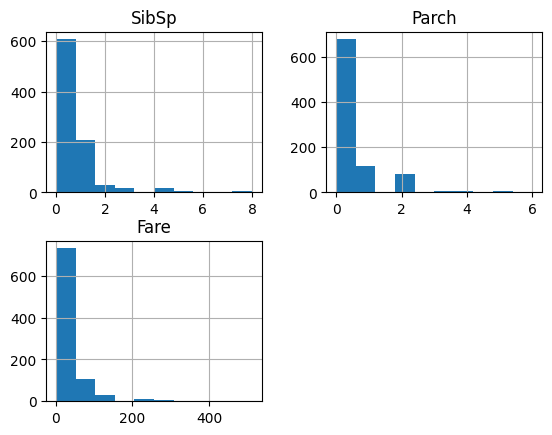

In [ ]:
df[['SibSp', 'Parch', 'Fare']].hist()

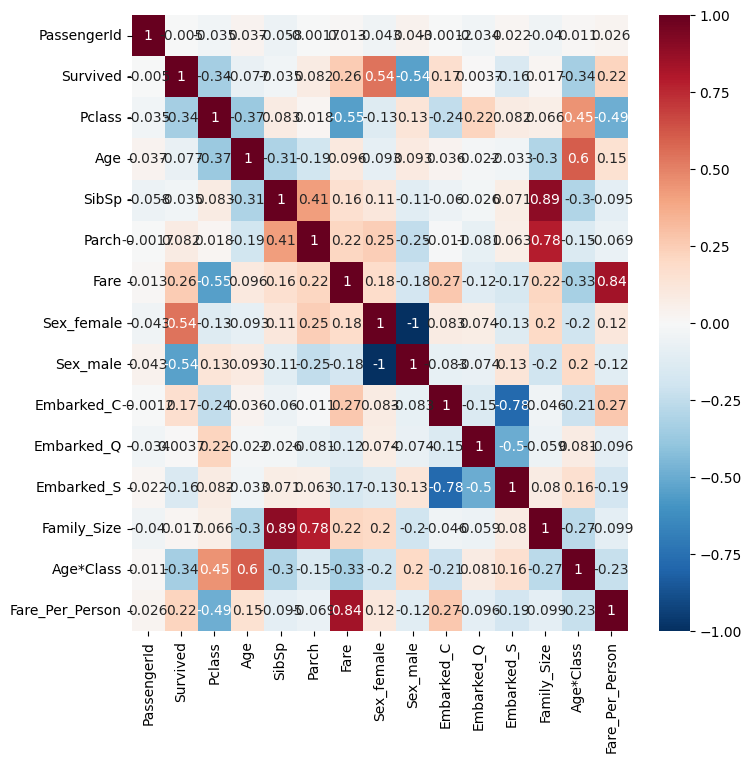

In [ ]:
df_corr = df.corr()

plt.figure(figsize = (8,8))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


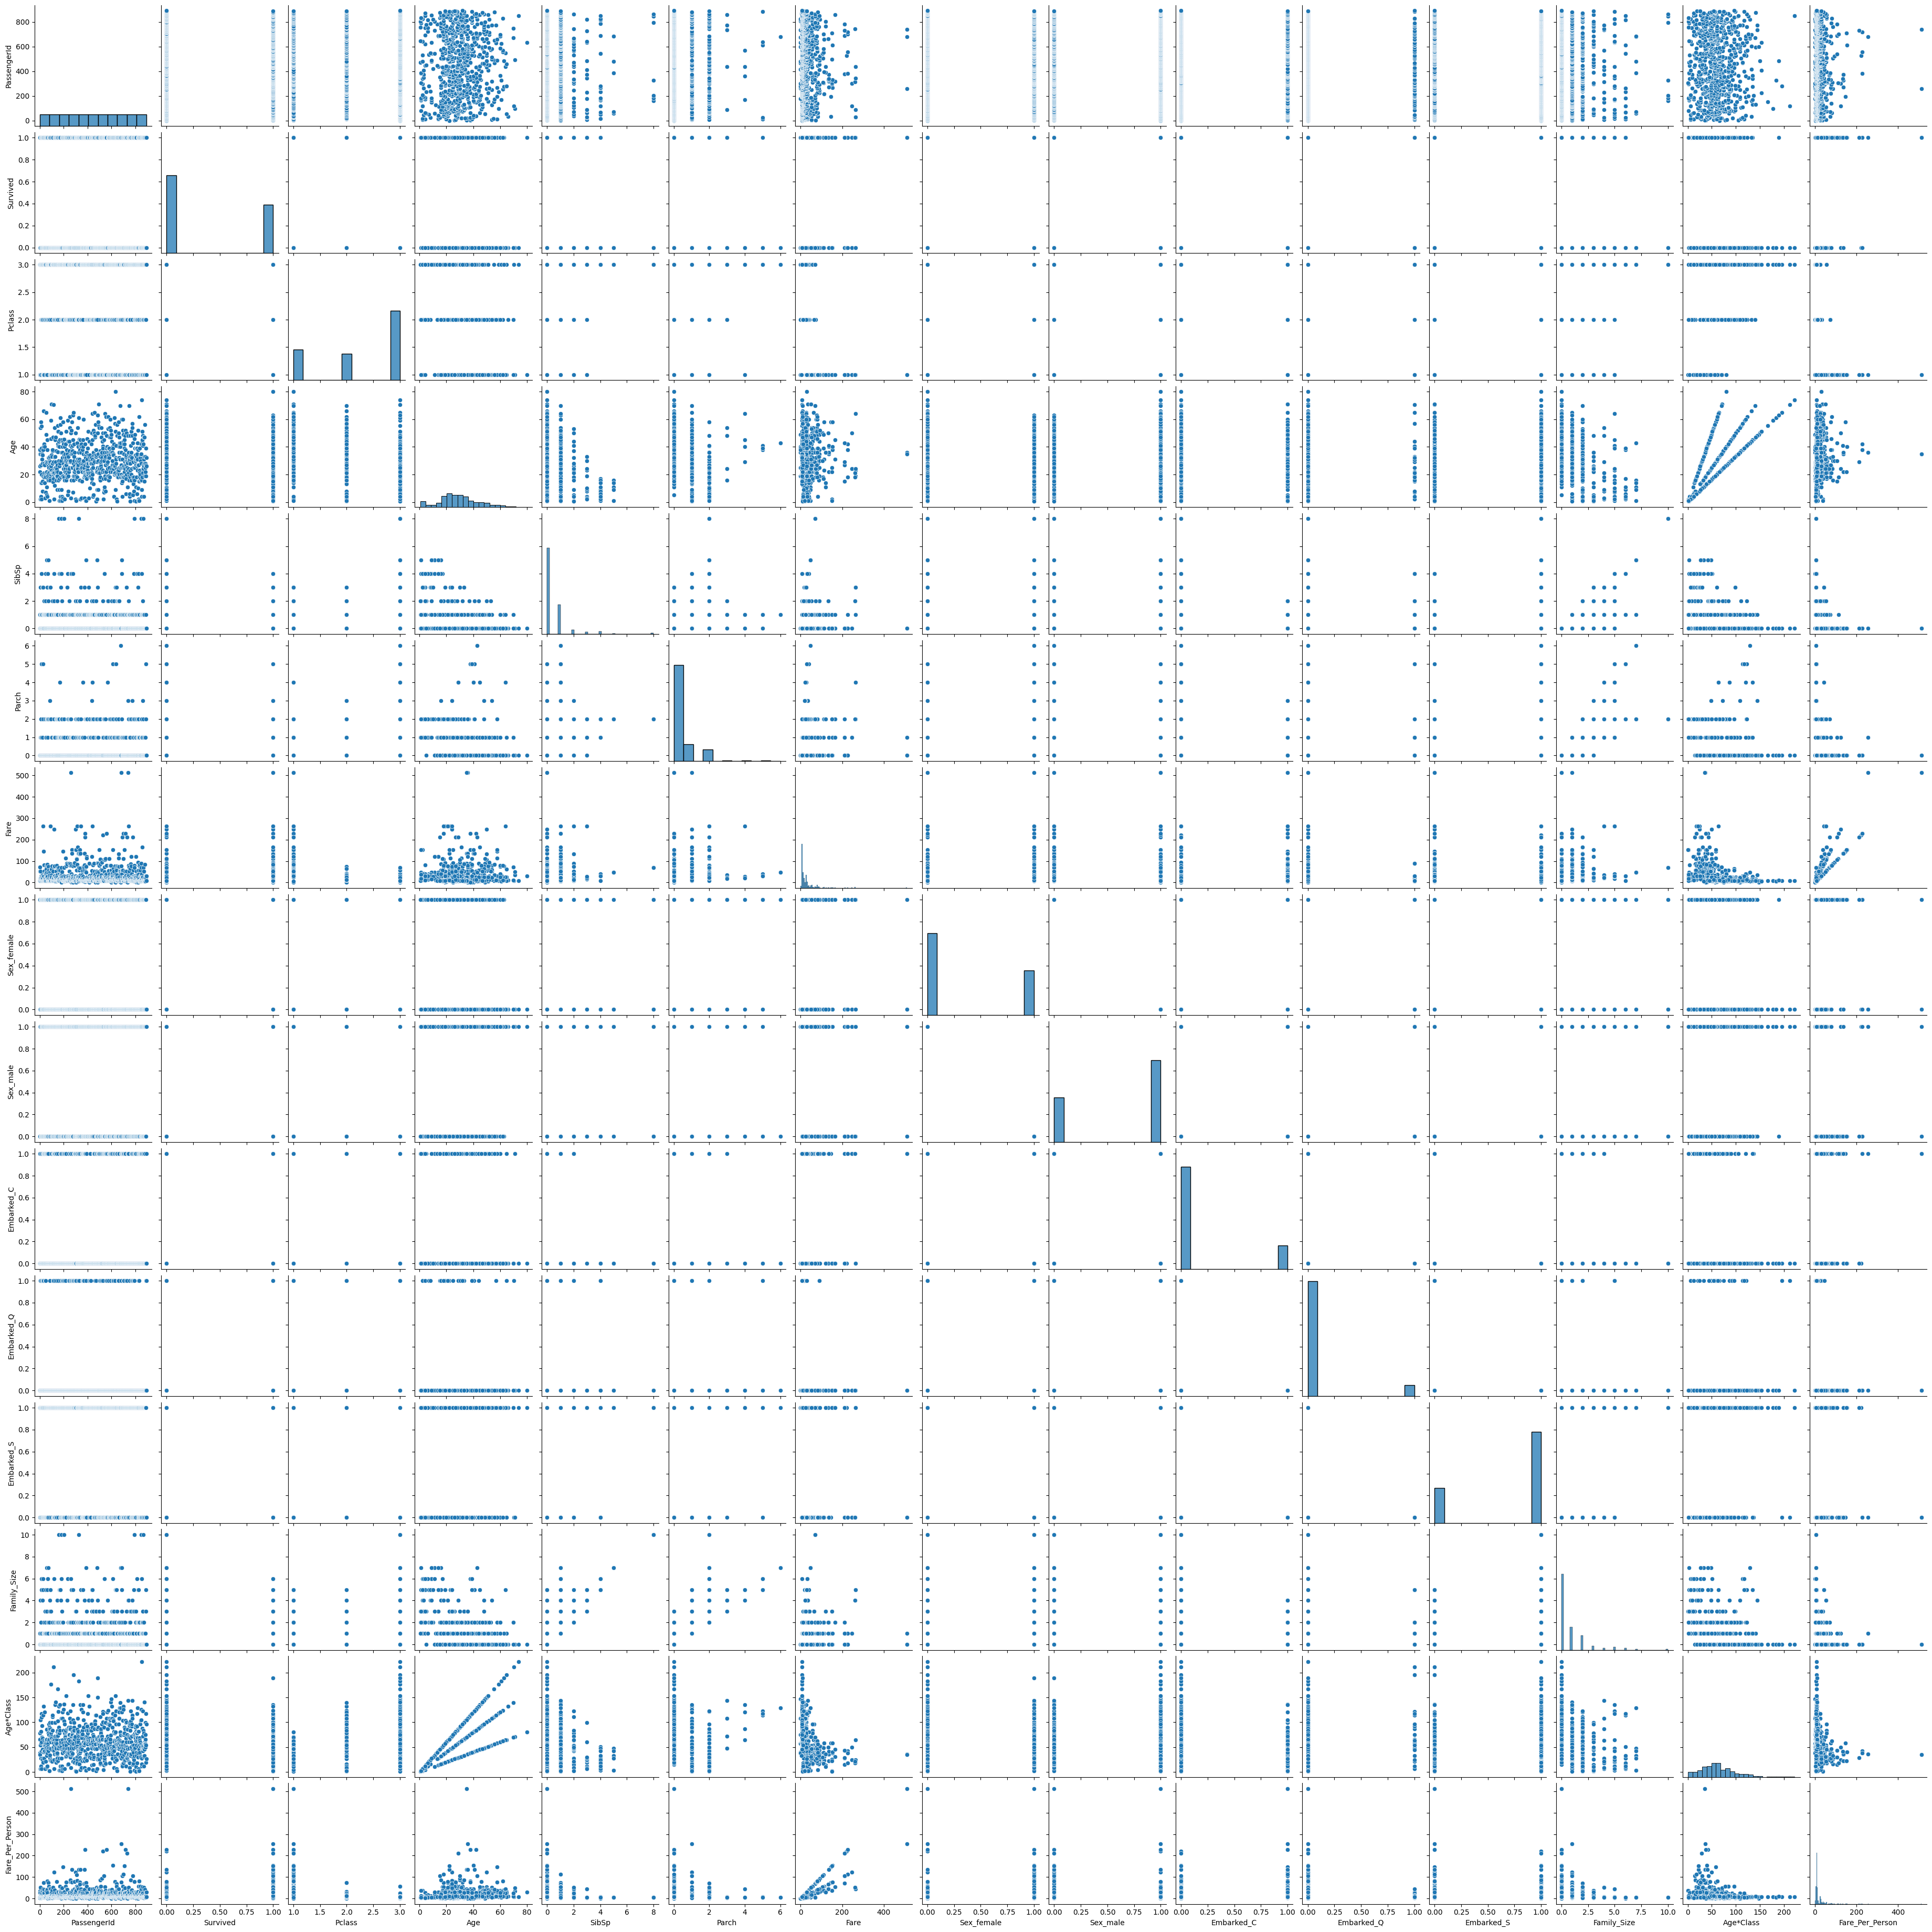

In [ ]:
sns.pairplot(df)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Family_Size'}>,
        <Axes: title={'center': 'Age*Class'}>],
       [<Axes: title={'center': 'Fare_Per_Person'}>, <Axes: >, <Axes: >]],
      dtype=object)

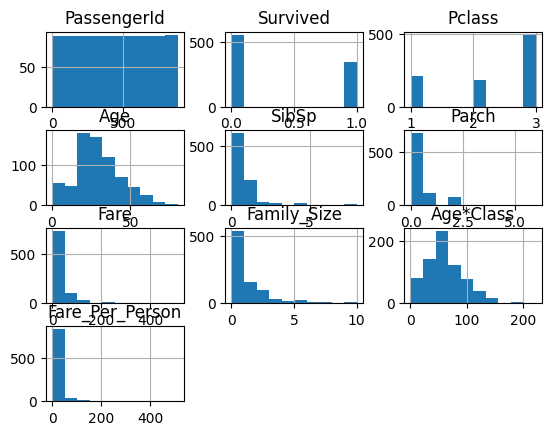

In [ ]:
df.hist()

In [ ]:
df[['SibSp', 'Parch', 'Fare', 'Family_Size', 'Fare_Per_Person']] = np.log1p(
    df[['SibSp', 'Parch', 'Fare', 'Family_Size', 'Fare_Per_Person']])

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Family_Size'}>,
        <Axes: title={'center': 'Age*Class'}>],
       [<Axes: title={'center': 'Fare_Per_Person'}>, <Axes: >, <Axes: >]],
      dtype=object)

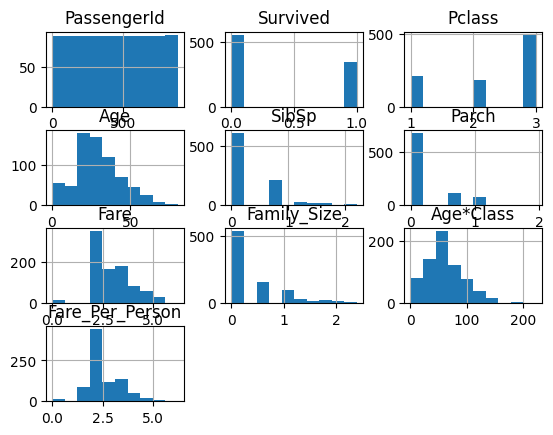

In [ ]:
df.hist()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


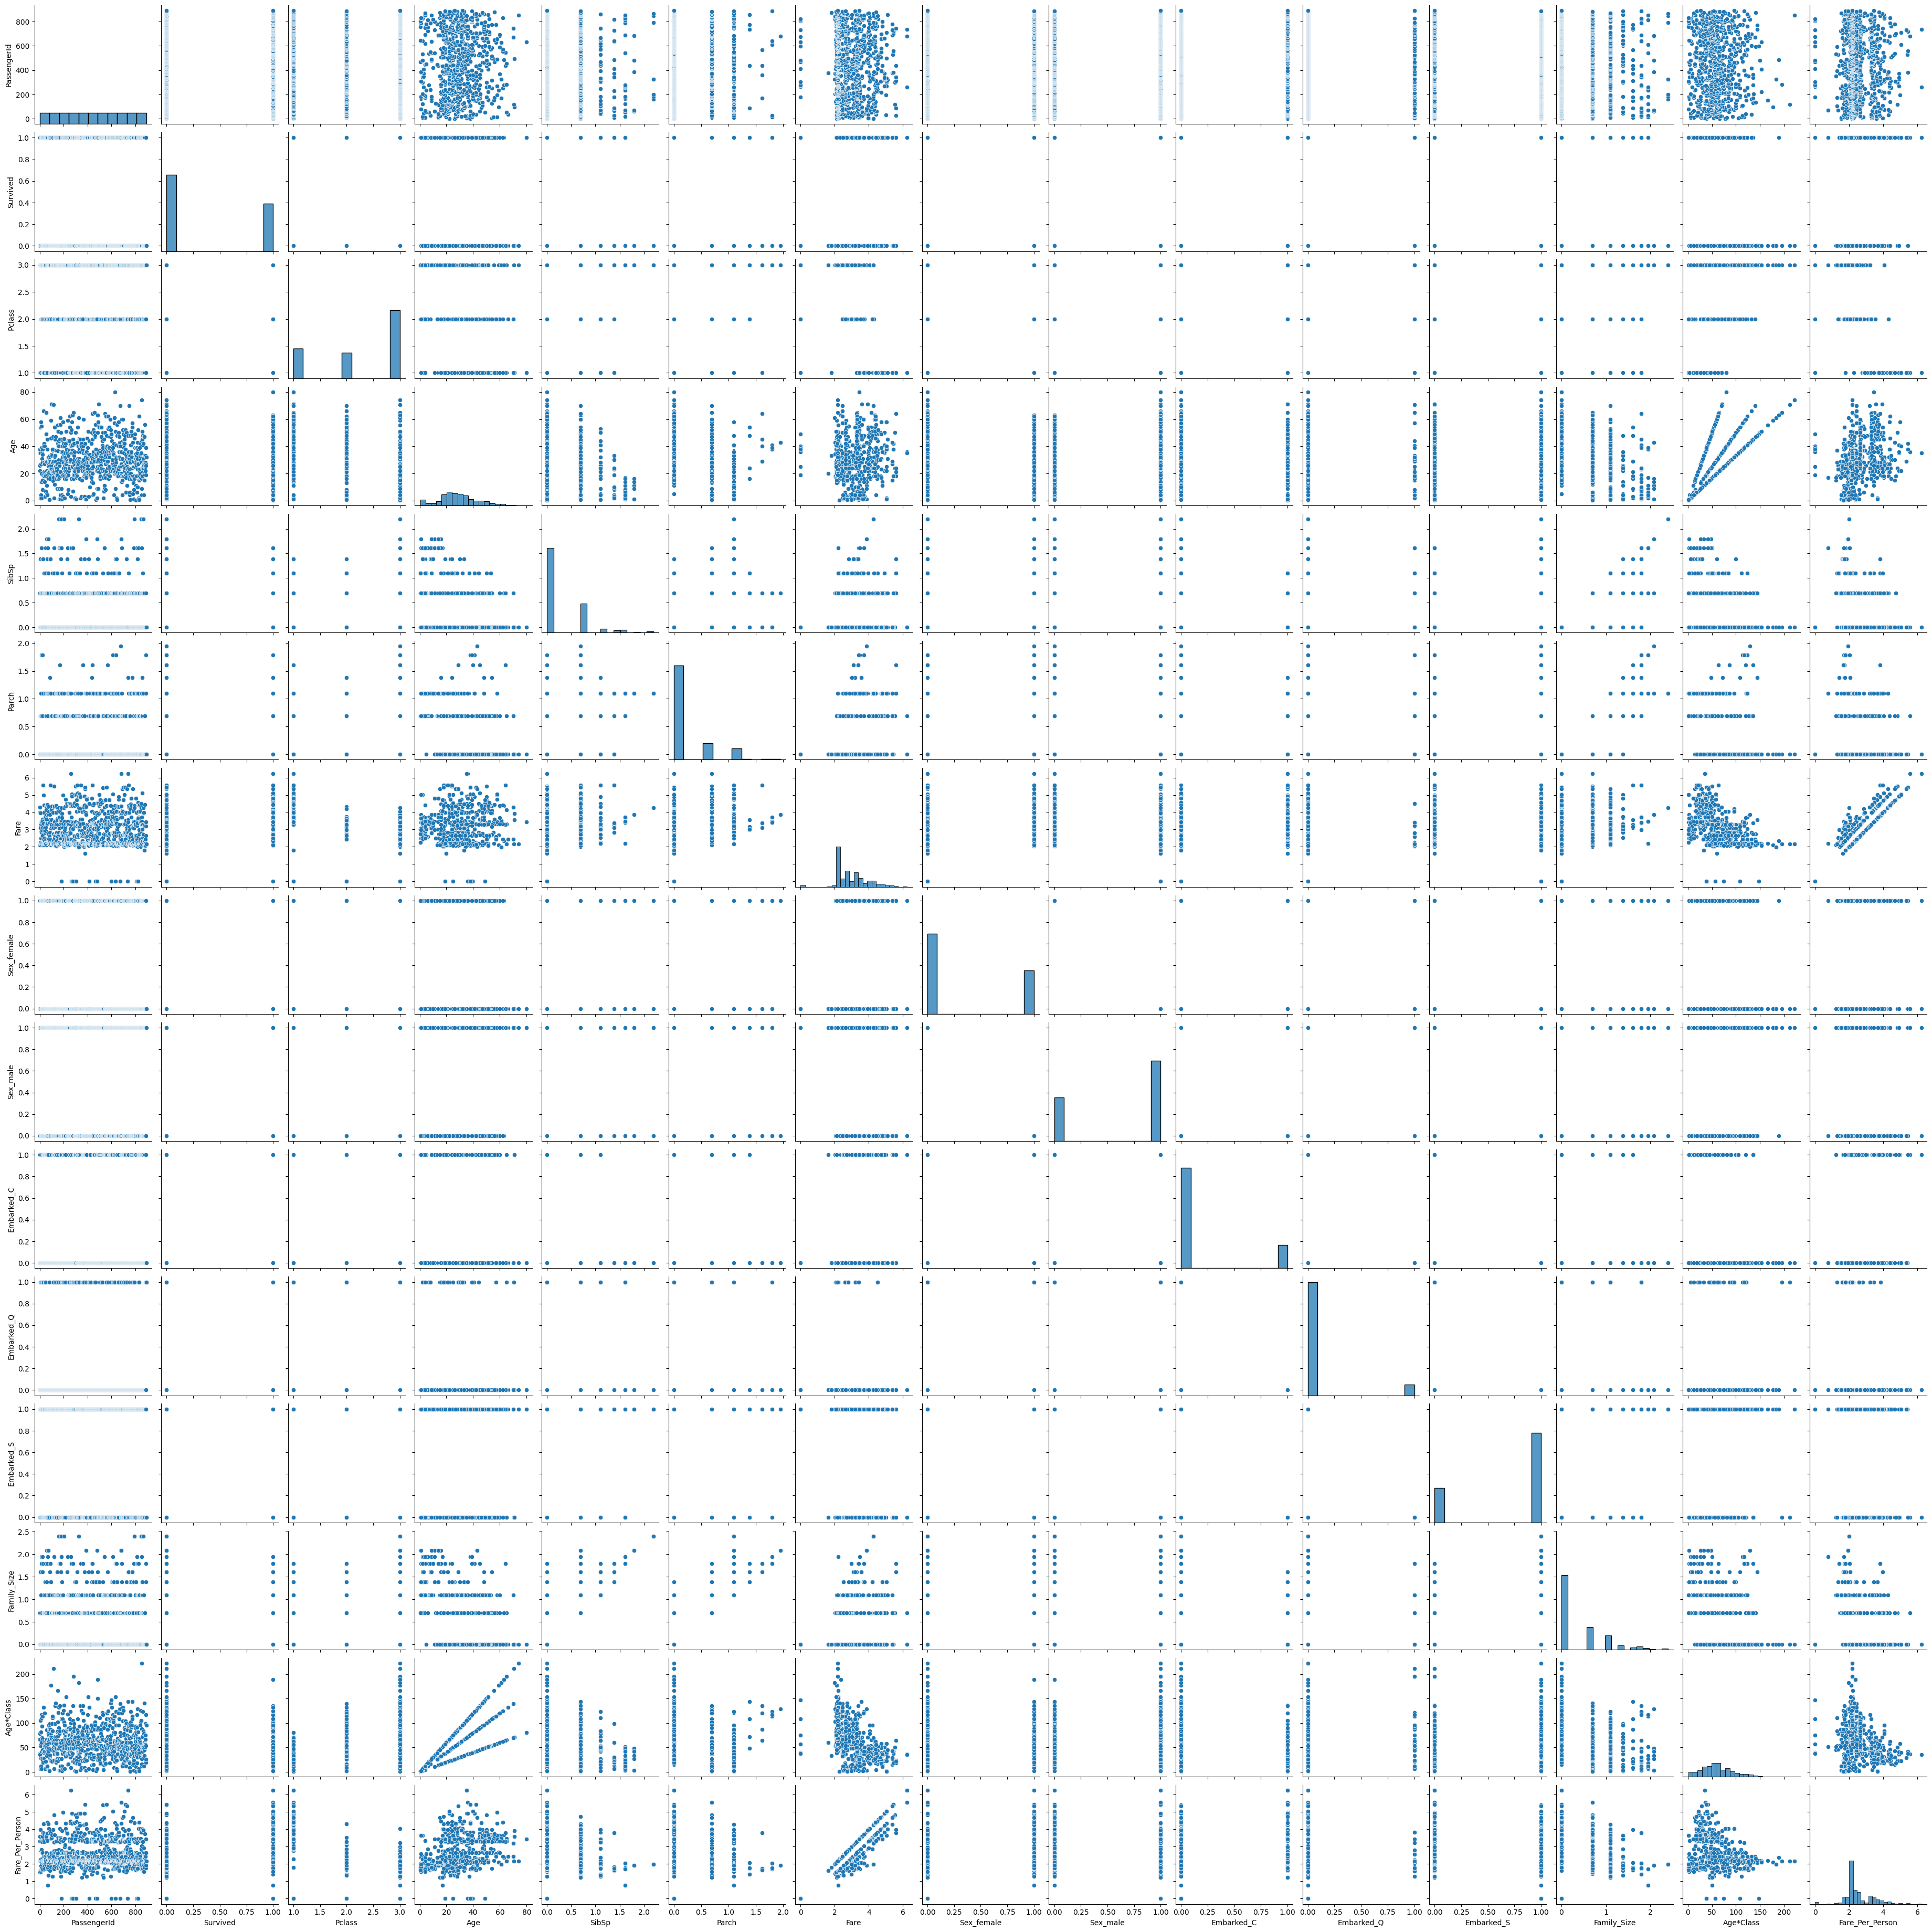

In [ ]:
sns.pairplot(df)

In [ ]:
df_corr = df.corr()
df_corr['Survived']

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp              0.029430
Parch              0.114999
Fare               0.329862
Sex_female         0.543351
Sex_male          -0.543351
Embarked_C         0.168240
Embarked_Q         0.003650
Embarked_S        -0.155660
Family_Size        0.107621
Age*Class         -0.338900
Fare_Per_Person    0.298824
Name: Survived, dtype: float64